Sine training example for FANN2
--
This is not space science (http://nxn.se/)

In [59]:
%matplotlib inline

from fann2 import libfann
from time import time
from math import pi, sin, cos

#### Generation of training data (sine values for x from 0 to 2*pi)

In [60]:
train_data = libfann.training_data()

inputData = [[0.0], [0.39269908169872414], [0.7853981633974483], [1.1780972450961724], [1.5707963267948966], [1.9634954084936207], [2.356194490192345], [2.748893571891069], [3.141592653589793], [3.5342917352885173], [3.9269908169872414], [4.319689898685965], [4.71238898038469], [5.105088062083414], [5.497787143782138], [5.890486225480862], [6.283185307179586]]
targetData = [[0.0], [0.38268343236508978], [0.70710678118654746], [0.92387953251128674], [1.0], [0.92387953251128674], [0.70710678118654757], [0.38268343236508989], [1.2246063538223773e-16], [-0.38268343236508967], [-0.70710678118654746], [-0.92387953251128652], [-1.0], [-0.92387953251128663], [-0.70710678118654768], [-0.38268343236509039], [-2.4492127076447545e-16]]

train_data.set_train_data(inputData, targetData)

In [61]:
#(train_data.get_input(), train_data.get_output())
(train_data.length_train_data(), train_data.num_input_train_data(), train_data.num_output_train_data())

(17, 1, 1)

In [62]:
patterns = 32
z = 10.
input_data = [[0.]]
target_data = [[0.]]
for r in range(1, patterns + 1):
    input_data.append([r*2*pi/patterns])
    target_data.append([sin(r*2*pi/patterns)*z])
print(input_data, "\n\n", target_data)

train_data = libfann.training_data()
train_data.set_train_data(input_data, target_data)

[[0.0], [0.19634954084936207], [0.39269908169872414], [0.5890486225480862], [0.7853981633974483], [0.9817477042468103], [1.1780972450961724], [1.3744467859455345], [1.5707963267948966], [1.7671458676442586], [1.9634954084936207], [2.1598449493429825], [2.356194490192345], [2.552544031041707], [2.748893571891069], [2.945243112740431], [3.141592653589793], [3.3379421944391554], [3.5342917352885173], [3.730641276137879], [3.9269908169872414], [4.123340357836604], [4.319689898685965], [4.516039439535327], [4.71238898038469], [4.908738521234052], [5.105088062083414], [5.301437602932776], [5.497787143782138], [5.6941366846315], [5.890486225480862], [6.086835766330224], [6.283185307179586]] 

 [[0.0], [1.9509032201612824], [3.826834323650898], [5.555702330196022], [7.071067811865475], [8.314696123025453], [9.238795325112868], [9.807852804032304], [10.0], [9.807852804032304], [9.238795325112868], [8.314696123025454], [7.0710678118654755], [5.555702330196022], [3.826834323650899], [1.9509032201

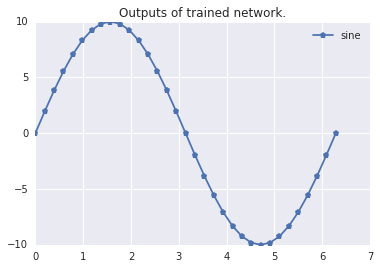

In [63]:
from pylab import *
import seaborn
#xkcd()
plot(input_data, target_data, '-p')
legend(('sine', 'network output'))
title('Outputs of trained network.')
show()

In [78]:
ann = libfann.neural_net()
ann.create_standard_array([1, 40, 30, 10, 1])

ann.set_learning_rate(0.7)
ann.set_activation_function_output(libfann.SIGMOID_SYMMETRIC_STEPWISE)
ann.set_activation_function_output(libfann.LINEAR)

max_iterations = 80000
iterations_between_reports =  8000
desired_error =  0.001
t0 = time()
ann.train_on_data(train_data, max_iterations, iterations_between_reports, desired_error)
print('MSE= ', ann.get_MSE())

ann.print_parameters() # print to terminal
ann.print_connections()
ann.save("sin_float.net")
t1 = time()
print( 'times: %s s' %(t1-t0))

MSE=  0.0009965480051257393
times: 13.750797033309937 s


In [79]:
netData = []
testData = []
print(input_data[0][0]+0.1)
for i in range(len(input_data)):
    print(ann.run(input_data[i]), target_data[i])
    testData.append(input_data[i][0]+0.25)
    netData.append(ann.run([input_data[i][0]+0.25]))

0.1
[-0.014186679027329174] [0.0]
[1.932341435332003] [1.9509032201612824]
[3.8273134224385794] [3.826834323650898]
[5.5551613909179025] [5.555702330196022]
[6.998119579288166] [7.071067811865475]
[8.337239058681325] [8.314696123025453]
[9.224846272879509] [9.238795325112868]
[9.804928118454406] [9.807852804032304]
[9.998610199092512] [10.0]
[9.860125935221669] [9.807852804032304]
[9.191146094327822] [9.238795325112868]
[8.319861221871427] [8.314696123025454]
[7.0597576561038595] [7.0710678118654755]
[5.566098293542989] [5.555702330196022]
[3.8114073634862633] [3.826834323650899]
[1.9212759134273083] [1.9509032201612861]
[0.04079575960713072] [1.2246063538223773e-15]
[-1.9575053175883874] [-1.9509032201612837]
[-3.870159808747794] [-3.8268343236508966]
[-5.5260254263301105] [-5.55570233019602]
[-7.126429646973853] [-7.071067811865475]
[-8.308332143626377] [-8.314696123025453]
[-9.301615049887774] [-9.238795325112864]
[-9.772637800515524] [-9.807852804032303]
[-9.928899012632804] [-10.0

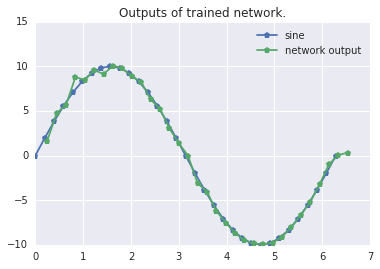

In [80]:
from pylab import *
#xkcd()
plot(input_data, target_data, '-p', testData, netData, '-p')
legend(('sine', 'network output'))
title('Outputs of trained network.')
show()

In [81]:
def writeFANN(file_name, input_data, target_data):
    """ 
    Р—Р°РїРёСЃР°С‚СЊ С„Р°Р№Р» РІ С„РѕСЂРјР°С‚Рµ FANN.dat
    """
    f = open(file_name, "w")
    f.write(str(len(input_data)) +" "+ str(len(input_data[0])) +" "+ str(len(target_data[0])) + "\n")
    for r in range(len(input_data)):
        for i in range(len(input_data[0])):
            f.write(str(input_data[r][i]) + " ")
        f.write("\n")
        for i in range(len(target_data[0])):
            f.write(str(target_data[r][i])+ " ")
        f.write("\n")
    f.close()
    return 0

In [68]:
writeFANN('sin.train', input_data, target_data)

0

Tips
--
* NeuralNetTools: Visualization and Analysis Tools for Neural Networks https://cran.r-project.org/web/packages/NeuralNetTools/
* http://feltes.ch/index.php/2015/10/03/classifing-mnist-dataset-with-fast-artificial-neural-network-library-fann-in-python/
